In [1]:
#Graphing the Archemedian spiral of prime numbers 

from scipy import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

%matplotlib inline

In [8]:
def is_prime(n):
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def gen_prime_spiral(num_max):
    nums = np.linspace(2, num_max, num=num_max, dtype=int)
    nums = nums[1:]
    
    #Generate array of primes 

    primelist = [] #appendable list

    for num in nums:
        if is_prime(num):
            primelist.append(num)
        
    primes = np.array(primelist)
    
    #Generate polar plot of primes
    
    fig = plt.figure(figsize=(24,24))
    plt.style.use('dark_background')
    #fig.patch.set_facecolor('black')
    
    ax1 = fig.add_subplot(111, projection='polar')
    ax1.scatter(primes, primes, s=1, c=primes, marker="*")
    ax1.axis('off')
    
    fig.tight_layout()
    fig.savefig("arch_spiral.png", transparent=False)
    plt.show()
    
def gen_3D_primes(num_max):
    
    nums = np.linspace(2, num_max, num=num_max, dtype=int)
    nums = nums[1:]
    
    #Generate array of primes 

    primelist = [] #appendable list

    for num in nums:
        if is_prime(num):
            primelist.append(num)
        
    primes = np.array(primelist)
    
    #Generate spherical polar plot of primes
    
    theta, phi = primes, primes
    THETA, PHI = np.meshgrid(theta, phi)

    R = primes
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)
    
    X = X.flatten()
    Y = Y.flatten()
    Z = Z.flatten()
    
    N = np.shape(X)[0]
    colors = np.random.rand(N)
    
    #%matplotlib auto
    
    fig = plt.figure(figsize=(4,4))
    plt.style.use('dark_background')
    #fig.patch.set_facecolor('black')
    
    ax1 = fig.add_subplot(111, projection='3d')
    #ax1.axis('off')
    ax1.scatter3D(X, Y, Z, s=1, c=colors, cmap=plt.get_cmap('jet'), marker="*")
    

    #ax1.set_zlim(-10,10)
    #ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
                     #linewidth=0, antialiased=False, alpha=0.5)
   
    
    fig.tight_layout()
    fig.savefig("arch_spiral3D.png", transparent=False)
    plt.show()
    

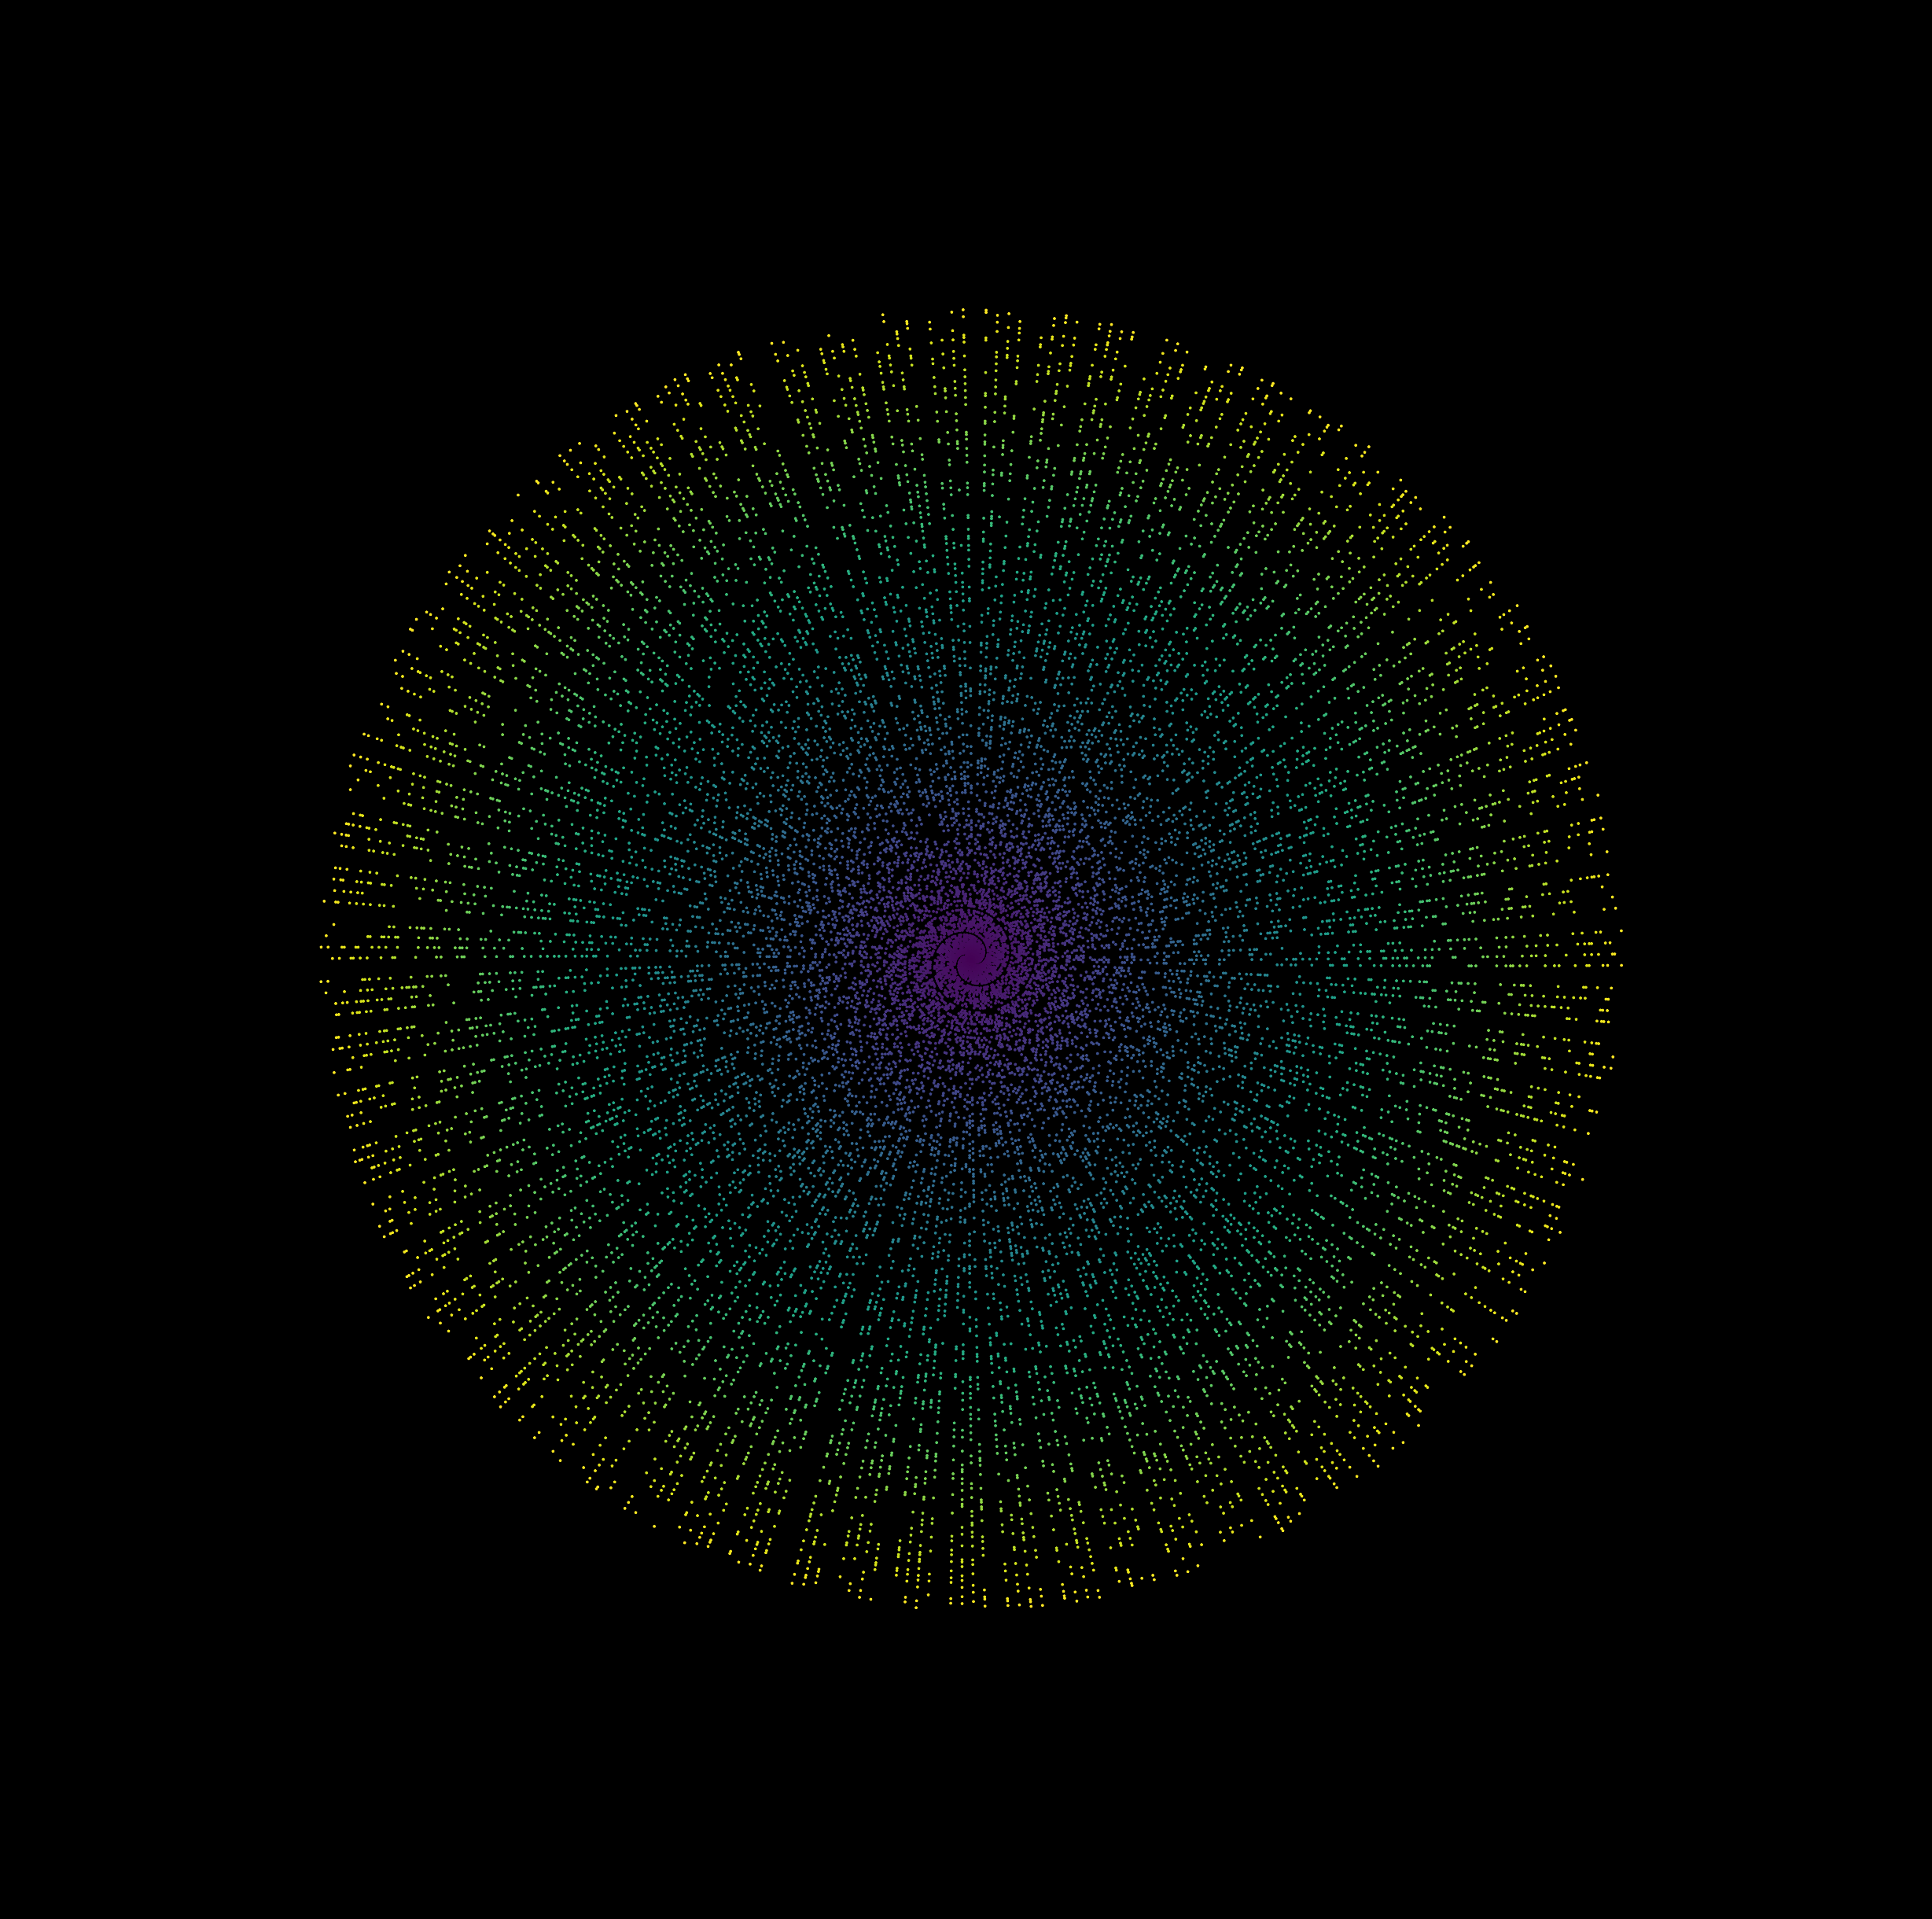

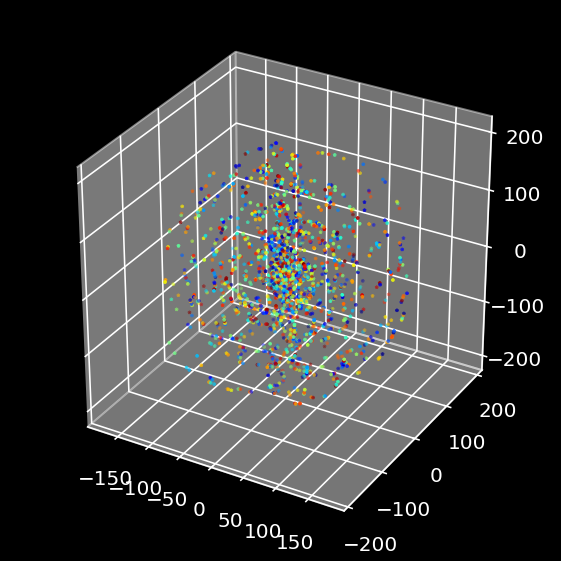

In [9]:
gen_prime_spiral(200001)
gen_3D_primes(201)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

%matplotlib auto

theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
R = (np.cos(PHI))**2
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure(figsize=(10,10))
plt.style.use('dark_background')
ax = fig.add_subplot(1,1,1, projection='3d')
ax.axis('off')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

Using matplotlib backend: MacOSX


In [11]:
# Author: Alex Baker
# Description: fixed version of the routine from the web
# Date : 2 Apr 2008

from numpy import *	# for outer and arange
import pylab as p	# for figure
import mpl_toolkits.mplot3d.axes3d as p3	# 3D axes class

fig = p.figure()	
ax = p3.Axes3D(fig)	

theta = arange(0,pi,pi/10)	
phi = arange(0,2*pi,pi/10)	
r = 2 * pow(math.e, -((theta**4)/(0.25**2))) # need to distort the radius by some function

x = r*outer(cos(phi), sin(theta))	
y = r*outer(sin(phi), sin(theta))
z = r*outer(ones(phi.shape), cos(theta))	

print(shape(x), shape(y), shape(z))

ax.plot_wireframe(x,y,z)
ax.axis('off')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

p.show()

(20, 10) (20, 10) (20, 10)


In [18]:
'''
=================================
3D surface with polar coordinates
=================================

Demonstrates plotting a surface defined in polar coordinates.
Uses the reversed version of the YlGnBu color map.
Also demonstrates writing axis labels with latex math mode.

Example contributed by Armin Moser.
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
#ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)
ax.scatter(X, Y, Z, cmap=r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()